# E-Commerce and Retail B2B Case Study

## Problem Statement
Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.

## Business Objective
* Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
* Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
* It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

In [4]:
# Importing required lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# Received Payment Data

## Step 1: Reading and Understanding the data

In [7]:
# Reading the dataset
rec_pay_data = pd.read_csv('Received_Payments_Data.csv')
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [8]:
# checking shape of the data
rec_pay_data.shape

(93937, 16)

In [9]:
# checking info of the data
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [10]:
# checking description of the data
rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [11]:
# checking number of unique values in the data
rec_pay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [12]:
# checking null values
round(rec_pay_data.isna().sum()/len(rec_pay_data.index),4)

RECEIPT_METHOD           0.0000
CUSTOMER_NAME            0.0000
CUSTOMER_NUMBER          0.0000
RECEIPT_DOC_NO           0.0003
RECEIPT_DATE             0.0000
CLASS                    0.0000
CURRENCY_CODE            0.0000
Local Amount             0.0000
USD Amount               0.0000
INVOICE_ALLOCATED        0.0000
INVOICE_CREATION_DATE    0.0000
DUE_DATE                 0.0000
PAYMENT_TERM             0.0000
INVOICE_CLASS            0.0000
INVOICE_CURRENCY_CODE    0.0000
INVOICE_TYPE             0.0000
dtype: float64

In 'RECEIPT_DOC_NO' column has 0.03% null values. so droping the columns

In [14]:
# droping the 'RECEIPT_DOC_NO' column
rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

In [15]:
# checking the head of data again
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [16]:
# changing the date related columns using datetime object

rec_pay_data['RECEIPT_DATE'] = pd.to_datetime(rec_pay_data['RECEIPT_DATE'])
rec_pay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(rec_pay_data['INVOICE_CREATION_DATE'])
rec_pay_data['DUE_DATE'] = pd.to_datetime(rec_pay_data['DUE_DATE'])

In [17]:
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods


In [18]:
# checking info again
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

Creating the target column 'default' based on the late bill payment.

In [20]:
# using boolean values and converting them into integer to create the target column 'default'

rec_pay_data['default'] = (rec_pay_data['RECEIPT_DATE'] > rec_pay_data['DUE_DATE']).astype(int)

In [21]:
# checking the count of defaulted bill payments
rec_pay_data.default.value_counts(normalize=True)

default
1    0.659783
0    0.340217
Name: proportion, dtype: float64

## Step 2: Exploratory Data Analysis

In [23]:
# categorical columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']
# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

## Univariate Analysis

## Numerical columns

In [26]:
# 'Local Amount' column summary

rec_pay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [27]:
# Checking the number of bills with local amount equal to 0
rec_pay_data[rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

1126 bills have amount equal to 0, hence dropping these rows.

In [29]:
# Droping the rows with 'Local Amount' = 0
rec_pay_data = rec_pay_data[rec_pay_data['Local Amount'] > 0]

# checking the shap again
rec_pay_data.shape

(92811, 16)

In [30]:
# checking the summary of 'Local Amount' column again
rec_pay_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

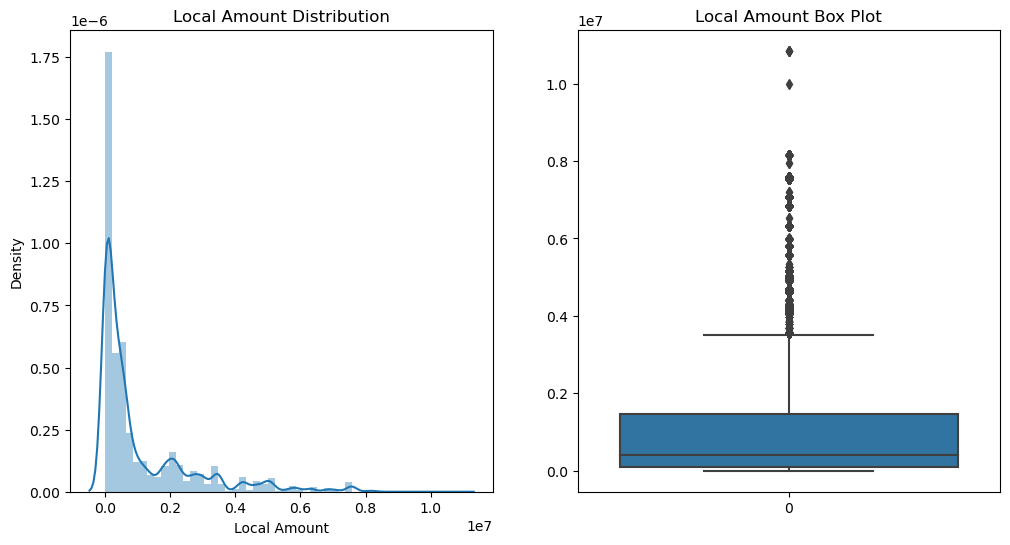

In [31]:
# Visualizing the distribution of 'Local Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

- Droping the 'Local Amount' column as it does not have a single currency value and we already have 'USD Amount' column for bill amount.

In [33]:
# Droping the 'Local Amount' column

rec_pay_data.drop('Local Amount', axis=1, inplace=True)

# checking the head of data
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [34]:
# 'USD Amount' column summary

rec_pay_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

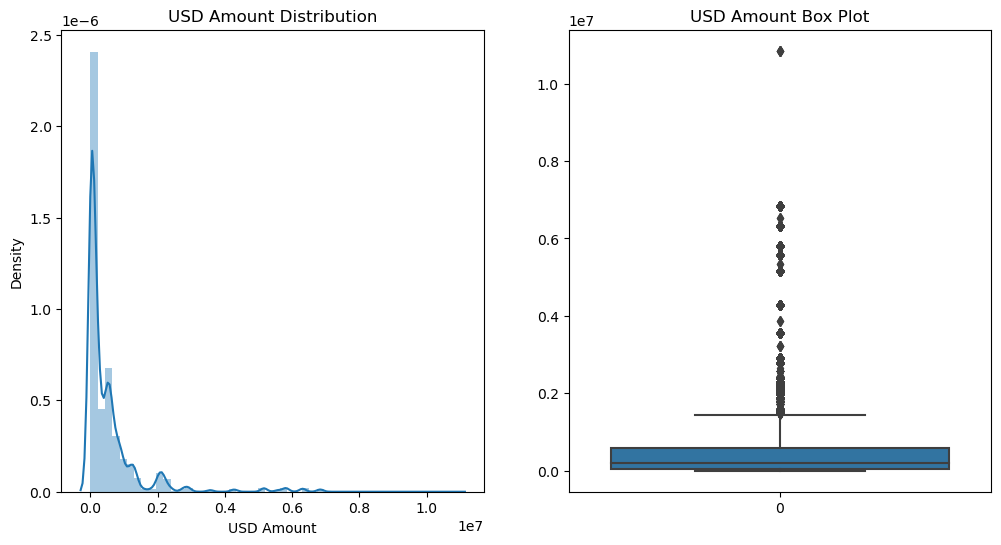

In [35]:
# visulizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

# Categorical Columns

### CUSTOMER_NAME column

In [38]:
# Finding the number of unique customer names
rec_pay_data['CUSTOMER_NAME'].nunique()

689

In [39]:
# Top 10 customers on the basis total invoices
rec_pay_data['CUSTOMER_NAME'].value_counts().head(10)

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: count, dtype: int64

In [40]:
# Top 10 customer based on the invoice amount in USD
rec_pay_data.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending= False).head(10)

CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
HABC Corp    5.343216e+08
RADW Corp    3.622376e+08
L OR Corp    2.955509e+08
CGR  Corp    2.795162e+08
PCD  Corp    2.466070e+08
Name: USD Amount, dtype: float64

## Class Column

In [42]:
# Checking the number of unique values in the column
rec_pay_data['CLASS'].nunique()

1

In [43]:
# Droping the CLASS column as it has only one value
rec_pay_data.drop('CLASS', axis=1, inplace=True)

## CURRENCY_CODE column

In [45]:
# Checking the number of unique values in the column
rec_pay_data['CURRENCY_CODE'].nunique()

8

In [46]:
# checking value counts
rec_pay_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

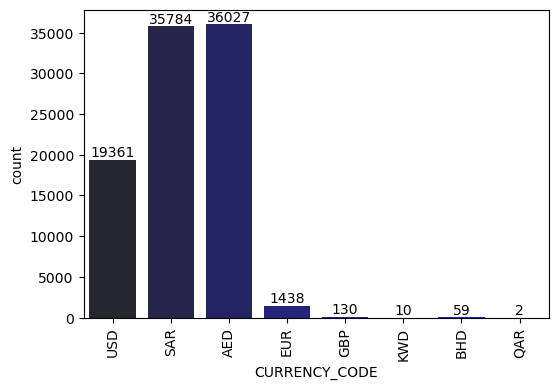

In [47]:
# Visualising the column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=rec_pay_data, x='CURRENCY_CODE', palette='dark:blue')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

Currency used for bill payments are mostly USD, SAR or AED.

## PAYMENT_TERM column

In [50]:
# checking the number of unique values in the column
rec_pay_data['PAYMENT_TERM'].nunique()

42

In [51]:
# checking the list of unique values
rec_pay_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [52]:
# checking the top 10 PAYMENT_TERM
rec_pay_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
15 Days from EOM          7533
Immediate Payment         5468
Immediate                 4946
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

## INVOICE_CLASS column

In [54]:
# checking the value count of each level of INVOICE_CLASS
rec_pay_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

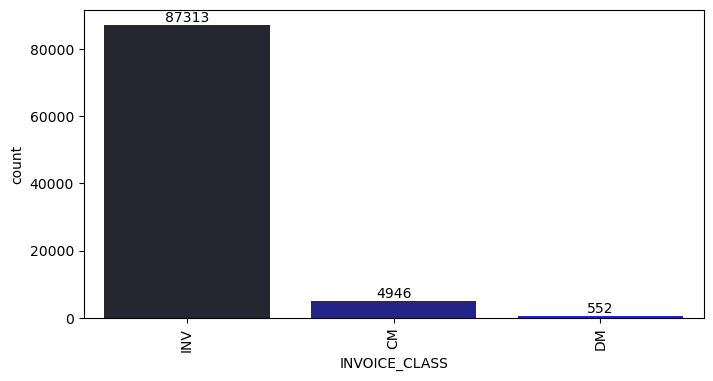

In [55]:
# visualising the columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_CLASS', palette='dark:blue')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

INV has the maximum number of bills in INVOICE_CLASS column.

## INVOICE_CURRENCY_CODE column

In [58]:
# checking the number of unique values in the column
rec_pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

In [59]:
# checking the value count of each level of INVOICE_CURRENCY_CODE
rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts()

INVOICE_CURRENCY_CODE
SAR    38491
AED    32119
USD    18389
EUR     1518
KWD     1088
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: count, dtype: int64

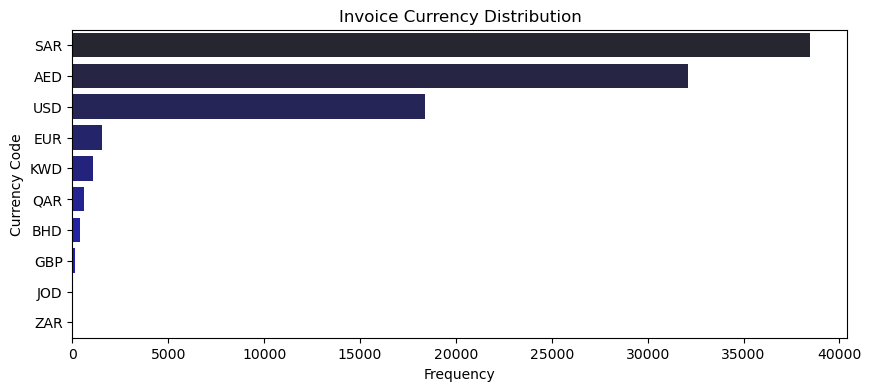

In [60]:
# visualising the column
plt.figure(figsize=(10, 4))
sns.countplot(data=rec_pay_data, y='INVOICE_CURRENCY_CODE', order=rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='dark:blue')
plt.title("Invoice Currency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Currency Code")
plt.show()


Most number of invoices were generated in SAR, AED and USD currency.

## INVOICE_TYPE column

In [63]:
# checking the number of unique values in the column
rec_pay_data['INVOICE_TYPE'].nunique()

2

In [64]:
# Checking the value count of each level of INVOICE_TYPE
rec_pay_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

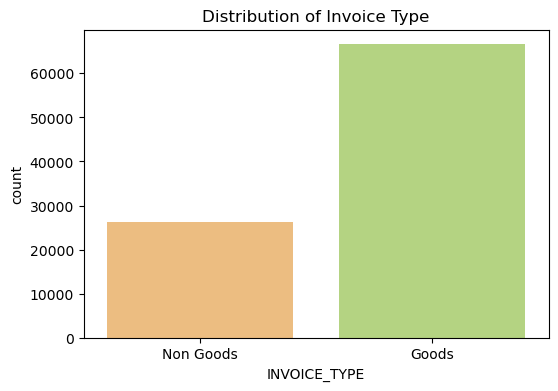

In [65]:
# visualising the column
plt.figure(figsize=(6, 4))
sns.countplot(data=rec_pay_data, x='INVOICE_TYPE', palette='RdYlGn')
plt.title("Distribution of Invoice Type")
plt.show()


Approximately 70% of the invoices generated were for Goods products.

## RECEIPT_METHOD column

In [68]:
# checking the value count of each level of RECEIPT_METHOD
rec_pay_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

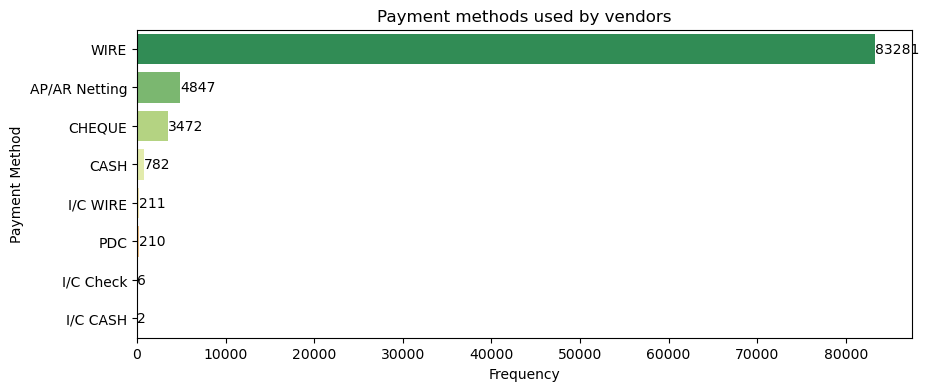

In [69]:
# visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='RECEIPT_METHOD', order=rec_pay_data['RECEIPT_METHOD'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")
plt.show()


The most preferred payment method for bill payment is WIRE.

# Data Imbalance

In [72]:
# checking the distribution of target column 'default'
rec_pay_data['default'].value_counts(normalize= True)

default
1    0.656528
0    0.343472
Name: proportion, dtype: float64

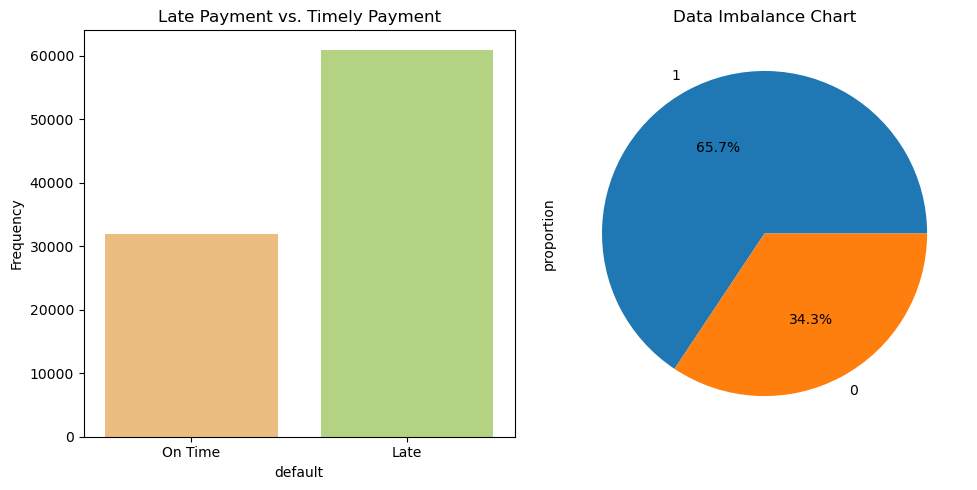

In [73]:
# Ploting the default column
plt.figure(figsize=(10, 5))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='default', data=rec_pay_data, palette='RdYlGn')
plt.title("Late Payment vs. Timely Payment")
plt.xticks([0, 1], ['On Time', 'Late'])
plt.ylabel("Frequency")

# Pie chart
plt.subplot(1, 2, 2)
rec_pay_data['default'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.tight_layout()
plt.show()


There is a good distribution of data in the target variable.

# Bi-variate Analysis

In [76]:
# Extracting month from the date columns

rec_pay_data['month_reciept'] = rec_pay_data['RECEIPT_DATE'].dt.month
rec_pay_data['month_inv_creation'] = rec_pay_data['INVOICE_CREATION_DATE'].dt.month
rec_pay_data['month_due'] = rec_pay_data['DUE_DATE'].dt.month

In [77]:
# Month-wise invoices due
orders_due_month = rec_pay_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [78]:
# effect of monthly due on late payment rate
# calculating the percentage of late payments for each month

late_dues = rec_pay_data.groupby('month_due')['default'].mean() * 100
late_dues = late_dues.sort_index(ascending=True)
late_dues

month_due
1      71.613388
2      68.804778
3      62.019856
4      62.045406
5      55.964267
6      41.607024
7      36.309915
8      79.348837
9      97.483589
10     99.936669
11    100.000000
12     99.983874
Name: default, dtype: float64

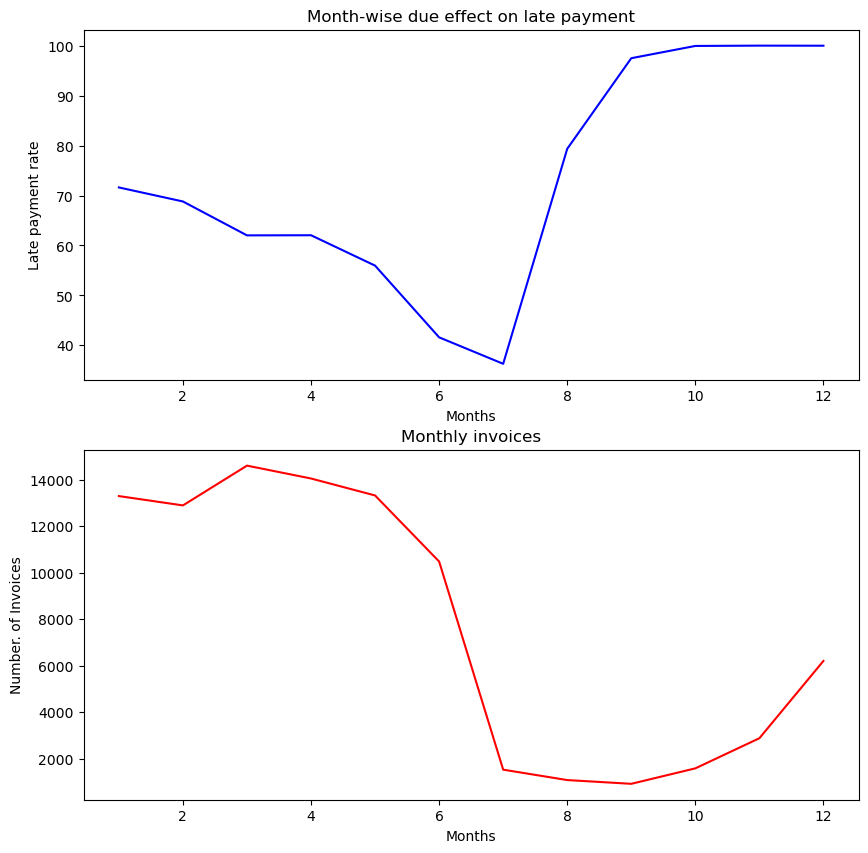

In [79]:
# visualising the effect of month on late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(late_dues, color='blue')
plt.title('Month-wise due effect on late payment')
plt.xlabel('Months')
plt.ylabel('Late payment rate')

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='red')
plt.title('Monthly invoices')
plt.xlabel('Months')
plt.ylabel('Number. of Invoices')
plt.show()

* In the 3rd month, the number of invoices is the highest and the late payment rate is relatively lower compared to other months with a high volume of invoices.
* The late payment rate in Month 7 is very low, likely due to the fact that the number of invoices is also low.
* The late payment rate rises sharply in the 2nd half of the year starting in the 7th month. In comparison to the first half of the year, there are less invoices.

In [81]:
# Receipt_date

# Number of payments received in each month
order_month_receipt = rec_pay_data.groupby('month_reciept').count()['DUE_DATE']

# Out of all the payments received in each month, calculate the late payment rate
monthly_receipt = rec_pay_data.groupby('month_reciept')['default'].mean() * 100
monthly_receipt

month_reciept
1    69.497951
2    66.695867
3    64.380826
4    63.287295
5    63.281925
6    66.585928
Name: default, dtype: float64

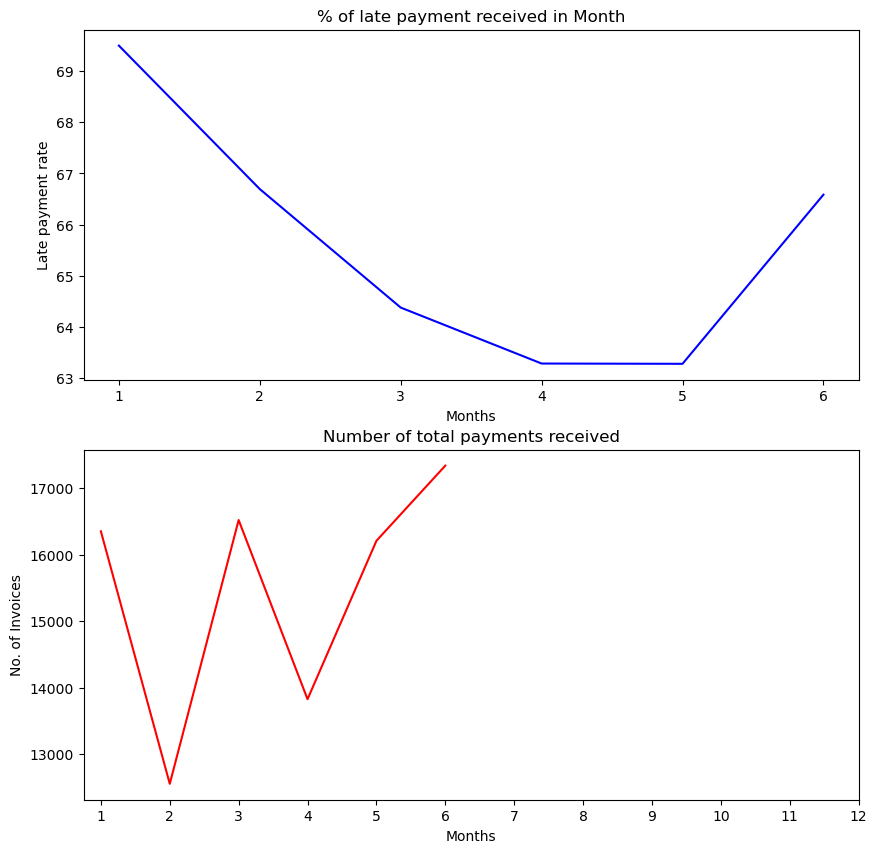

In [82]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_month_receipt, color='red')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

* No payment received against any invoice from 7th month onwards

In [84]:
# invoice creation date

# number of invoices generated in month
orders_month_created = rec_pay_data.groupby('month_inv_creation').count()['DUE_DATE']
 
# out of all the invoices created percentage of late payment
month_created = rec_pay_data.groupby('month_inv_creation')['default'].mean()

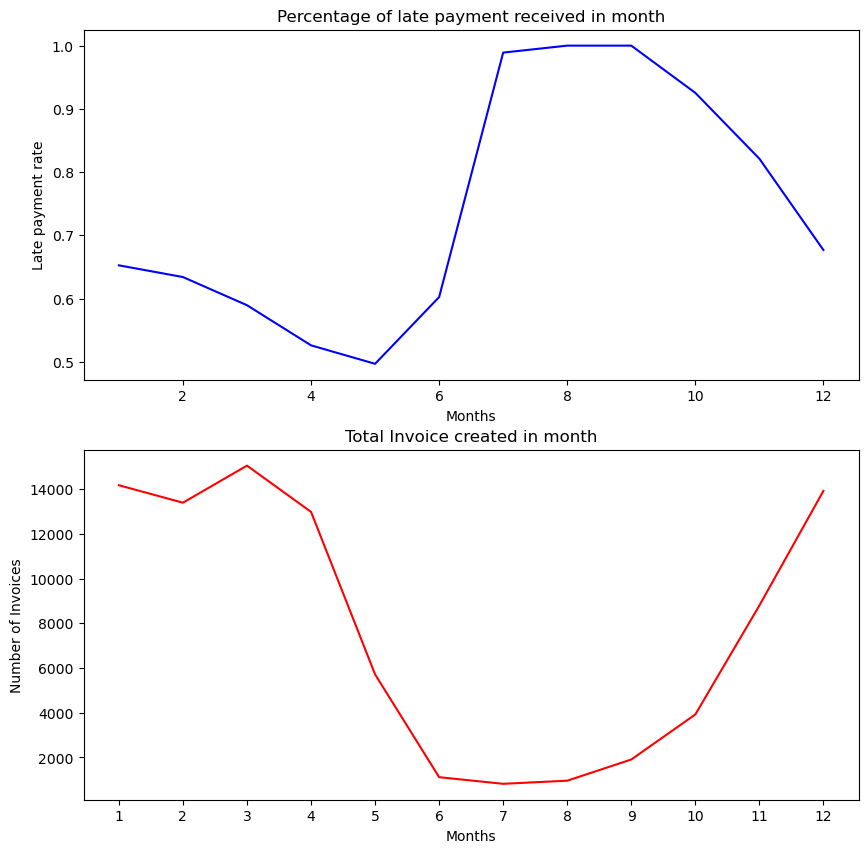

In [85]:
# visualizing the effect of months in which the invoice is due, on the late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(month_created, color='blue')
plt.title('Percentage of late payment received in month')
plt.xlabel('Months')
plt.ylabel('Late payment rate')

plt.subplot(2,1,2)
plt.plot(orders_month_created, color='red')
plt.title('Total Invoice created in month')
plt.xticks([i for i in range(1,13,1)])
plt.xlabel('Months')
plt.ylabel('Number of Invoices')
plt.show()

* Late payment rate is decreases from 1st to 5th month.
* For the months 7, 8 and 9 the late payment rate is very high.

## USD Amount column

In [88]:
# Assuming rec_pay_data is your DataFrame
usd_amt_late = rec_pay_data.pivot_table(values='USD Amount', index='default', aggfunc=['mean', 'median', np.std]).reset_index()

# Display the resulting pivot table
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


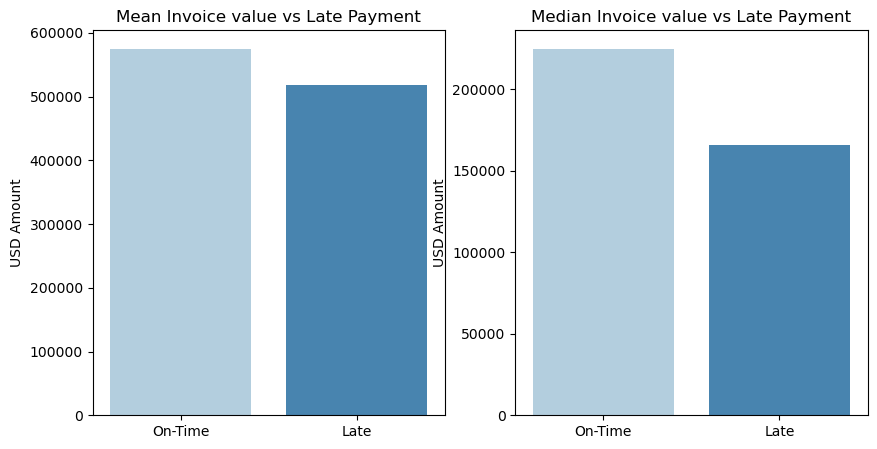

In [89]:
# Visualizing the difference between the invoice value's mean and median in relation to late payment

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='default', y=('mean','USD Amount'), palette='Blues')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='default', y=('median','USD Amount'), palette='Blues')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

* On-time bill payment has a higher mean and median invoice value than late payment.

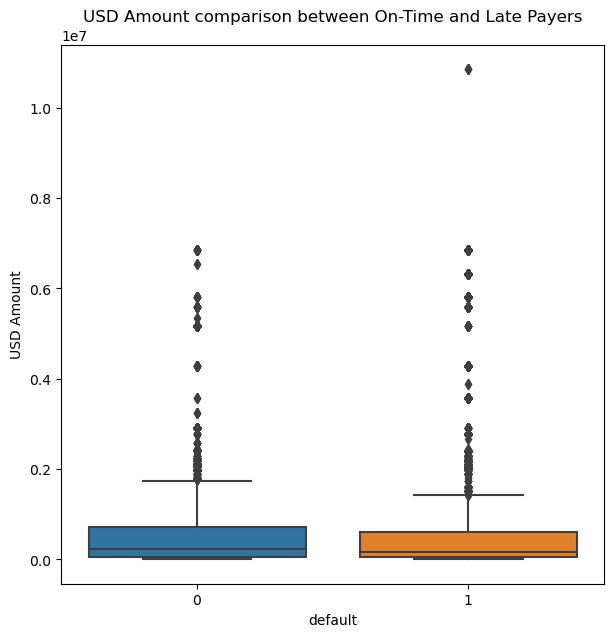

In [91]:
# USD amount comparison between On-time and Late 

plt.figure(figsize=(7,7))

sns.boxplot(y = 'USD Amount', x='default', data = rec_pay_data)
plt.title('USD Amount comparison between On-Time and Late Payers')
plt.show()

## CUSTOMER_NAME column

In [93]:
# checking data type
print(rec_pay_data['default'].dtype)

int32


In [94]:
# converting Non-numeric values to numeric
rec_pay_data['default'] = pd.to_numeric(rec_pay_data['default'], errors='coerce')

In [95]:
# handle missing values
rec_pay_data['default'].fillna(0, inplace=True) 

In [96]:
# Sorting late payment rate per customer
customer_total_orders_late = rec_pay_data.groupby('CUSTOMER_NAME')['default'].mean().sort_values(ascending=False).reset_index()


In [97]:
# Counting total orders per customer
customer_total_orders = rec_pay_data.groupby('CUSTOMER_NAME').size().sort_values(ascending=False).reset_index(name='Total_Orders')

In [98]:
customer_total_orders_late

,CUSTOMER_NAME,default
0,ZV F Corp,1.0
1,IT C Corp,1.0
2,JOEY Corp,1.0
3,JIBB Corp,1.0
4,JC G Corp,1.0
...,...,...
684,TAKA Corp,0.0
685,LIVE Corp,0.0
686,LONG Corp,0.0
687,LOUV Corp,0.0


In [99]:
customer_total_orders

,CUSTOMER_NAME,Total_Orders
0,SEPH Corp,23075
1,FARO Corp,15004
2,PARF Corp,6624
3,ALLI Corp,5645
4,AREE Corp,2224
...,...,...
684,DEFI Corp,1
685,DESI Corp,1
686,OMRA Corp,1
687,NOUS Corp,1


In [100]:
# Checking Column Names
print(customer_total_orders.head())


  CUSTOMER_NAME  Total_Orders
0     SEPH Corp         23075
1     FARO Corp         15004
2     PARF Corp          6624
3     ALLI Corp          5645
4     AREE Corp          2224


In [101]:
print(customer_total_orders.head())

  CUSTOMER_NAME  Total_Orders
0     SEPH Corp         23075
1     FARO Corp         15004
2     PARF Corp          6624
3     ALLI Corp          5645
4     AREE Corp          2224


In [102]:
# Finding the important customers (customer with more than 500 orders)

imp_cust = customer_total_orders[customer_total_orders['Total_Orders'] > 500]['CUSTOMER_NAME']
imp_cust




0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [103]:
# Checking only important customers late payment rate

imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,default
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


## Invoice_CLASS column

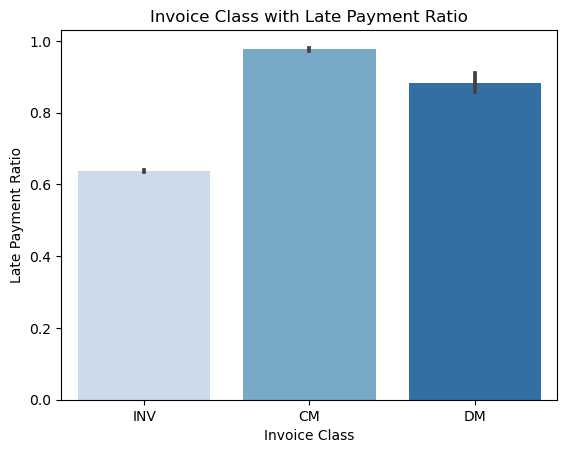

In [105]:
# Visualising the Late payment ratio of each invoice class
sns.barplot(data=rec_pay_data, x='INVOICE_CLASS', y='default', estimator=np.mean, palette='Blues')
plt.title('Invoice Class with Late Payment Ratio')
plt.xlabel('Invoice Class')
plt.ylabel('Late Payment Ratio')
plt.show()

* Late Payment ratio is very high for 'CM' and low for 'INV' in INVOICE_CLASS.

## INVOICE_TYPE class

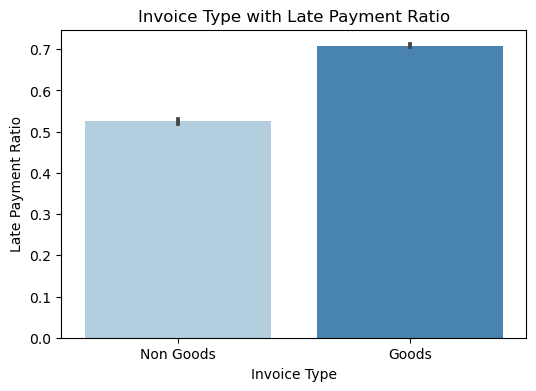

In [108]:
# Visualising the late payment ratio of each INVOICE TYPE

plt.figure(figsize=(6,4))

sns.barplot(data=rec_pay_data, x= 'INVOICE_TYPE', y='default', estimator=np.mean, palette='Blues')
plt.title('Invoice Type with Late Payment Ratio')
plt.xlabel('Invoice Type')
plt.ylabel('Late Payment Ratio')
plt.show()


* Late payment ratio for Goods is higher than Non-Goods.

## Step 3: Feature Engineering

### PAYMENT_TERM column

In [112]:
## using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [113]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum


PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

* Since 10 values, as can be seen, cover about 95% of the data, we will group the remaining values from both datasets together.

In [115]:
# top 10values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

rec_pay_data['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

# Dummy Variable

In [117]:
# creating dummy variables for the 'PAYMENT_TEAM' column

team_dummies = pd.get_dummies(rec_pay_data['PAYMENT_TERM']).drop('others', axis=1)

rec_pay_data = rec_pay_data.join(team_dummies).drop('PAYMENT_TERM', axis=1)

rec_pay_data.shape

(92811, 26)

In [118]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(rec_pay_data['INVOICE_CLASS'])
class_dummies
rec_pay_data = rec_pay_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [119]:
rec_pay_data.shape

(92811, 28)

In [120]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

# Open Invoice Data

## Reading and Understanding the Data

In [123]:
# reading the open invoice dataset

open_data = pd.read_csv('Open_Invoice_data.csv', encoding='latin1')
open_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [124]:
# checking shape
open_data.shape

(88204, 14)

In [125]:
# Removing unecessary columns (that are not there in the receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' as they bear no significance for our target var.
# Dropping 'Local amount'

open_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [126]:
# Checking the shape of the data again
open_data.shape

(88204, 7)

In [127]:
# checking the head again
open_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [128]:
# Checking the info of the data
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [129]:
# checking null values

round(open_data.isna().sum()/len(open_data.index),4)

Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

* No null values present in the dataset.

In [131]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
open_data['Due Date'] = pd.to_datetime(open_data['Due Date'])
open_data['INV_CREATION_DATE'] = pd.to_datetime(open_data['INV_CREATION_DATE'])

In [132]:
# Checking the different values present in USD Amount column
open_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [133]:
# changing the datatype of USD amount

open_data['USD Amount'] = open_data['USD Amount'].apply(lambda x: x.replace(",", ""))
open_data['USD Amount'] = open_data['USD Amount'].astype(int)



In [134]:
# Checking the USD Amount column again
open_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

* Since the column contains negative values, removing negative and 0 values is safe.

In [136]:
# Keeping the values above 0 for USD Amount column
open_data = open_data[open_data['USD Amount']>0]

In [137]:
# Checking the info of the data set
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


* Now all columns are in correct format now.

## Feature Engineering

### Payment Term Column

In [141]:
# keeping the same levels as done in recieved payment dataset
import numpy as np

open_data['Payment Term'] = np.where(open_data['Payment Term'].isin(vals_to_keep), open_data['Payment Term'], 'others')
print(open_data['Payment Term'].value_counts())

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64


In [142]:
# creating dummy variables for 'Payment Team', excluding the 'other' category

term_dummies_open = pd.get_dummies(open_data['Payment Term']).drop('others', axis=1).astype(int)

# merging the dummies into open_data and removing the original 'Payment Term' column
open_data = open_data.join(term_dummies_open).drop('Payment Term', axis=1)

# checking the first few rows of updated DataFrame
open_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


## Transaction Class column

In [144]:
# checking the levels of the column

open_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [145]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [146]:
# Creating dummy variables for the column
tc = pd.get_dummies(open_data['Transaction Class'], dtype=int)

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_data['CM'] = 0

In [147]:
# Checking the head of the data
open_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0


### checking the columns in received payment dataset and open invoice dataset

In [149]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [150]:
open_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

## Customer Segmentation

RECOMMENDATION : Aspects at the customer level might potentially be significant independent variables to add to the model. Customer segmentation can be used to identify a customer-level attribute. Two derived variables must be used to segment your customer base: the standard deviation of the payment time and the average payment time in days for each customer. A few unique client clusters would be produced by using clustering techniques, and these might be used as input variables for the machine learning model.

In [153]:
## Creating a new column to show actual number of days taken to make the payment after invoice generation

rec_pay_data['Act_days_for_pay'] = (rec_pay_data['RECEIPT_DATE']-rec_pay_data['INVOICE_CREATION_DATE']).dt.days

In [154]:
# Calculating customer wise average days for payment

cust_seg1 = rec_pay_data.groupby('CUSTOMER_NAME')['Act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'Act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [155]:
# Calculating the standard deviation for customer wise payment days

cust_seg2 = rec_pay_data.groupby('CUSTOMER_NAME')['Act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'Act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [156]:
# merging the above two dataframes

cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


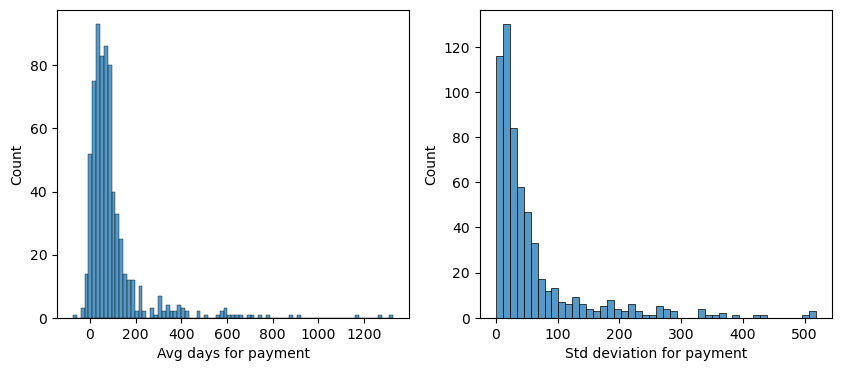

In [157]:
# Visualising the cust_seg dataframe

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])
plt.show()

* From the above plots we can see that the data is not normalized, hence need to do scaling.

In [159]:
## Importing required library

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

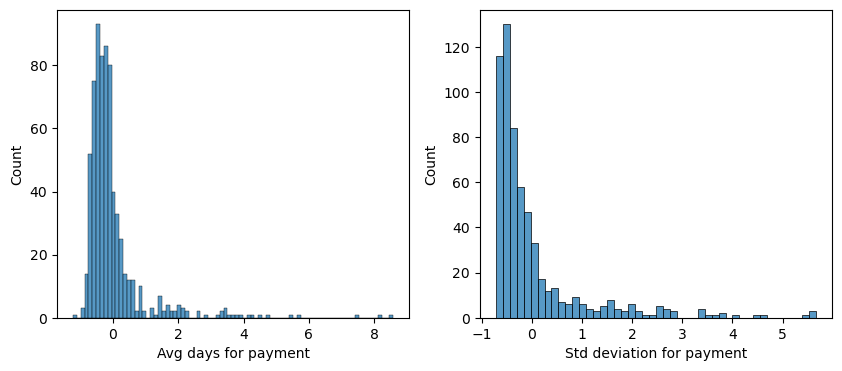

In [160]:
# visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])
plt.show()

In [161]:
# resetting the index
cust_seg.reset_index(inplace=True)

# checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [162]:
# Replacing the null values for std deviation for payment with 0

cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [163]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [164]:
# droping CUSTOMER_NAME for clustering
cluster_df.drop('CUSTOMER_NAME', axis=1, inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


## Clustering

In [166]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [167]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[ 1.85344423,  3.33339499],
       [-0.3019069 , -0.32884213],
       [ 4.66736808,  0.44512922],
       [ 0.42465258,  0.94746544]])

## Finding optimal number of clusters

In [169]:
## silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.7491797445652462
For n_clusters=4, the silhouette score is 0.6097388985555463
For n_clusters=5, the silhouette score is 0.6173540681032771
For n_clusters=6, the silhouette score is 0.3980238443004184
For n_clusters=7, the silhouette score is 0.4012628375918799
For n_clusters=8, the silhouette score is 0.41457849738976615


* From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [171]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [172]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [173]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1
2,A3 D Corp,-0.387513,-0.075683,1
3,ABC Corp,-0.593276,-0.724119,1
4,ABDU Corp,-0.167009,-0.046851,1


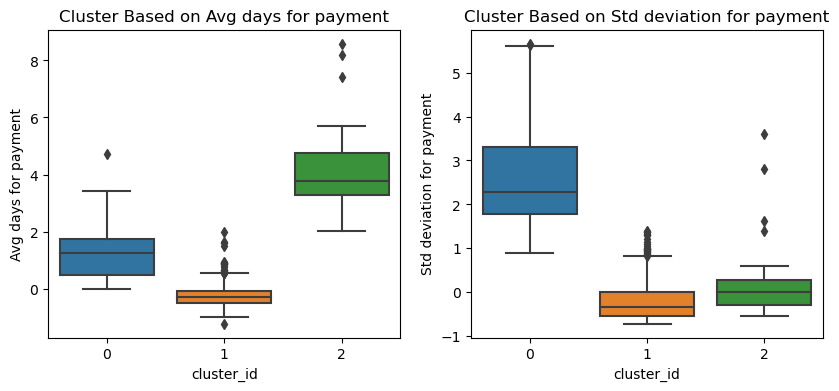

In [174]:
# plotting box plot based on clusters

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

In [175]:
## Droping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers

cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [176]:
# creating a copy

cust_dict = cust_seg.copy()

In [177]:
# Renaming the column

cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [178]:
# setting the 'Customer_Name' as index

cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

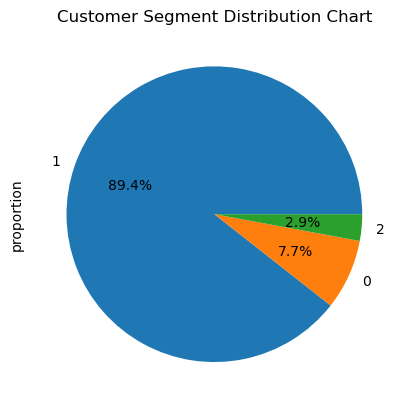

In [179]:
# Pie chart for Customer Segment Distribution 
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title('Customer Segment Distribution Chart')

* From the above we can see that early customers comprise of 89.4% of customers medium and prolonged payers are 10.6% in total

In [181]:
# Convert all Boolean columns in the DataFrame to integers (0 and 1)
import pandas as pd

# Merge the datasets (assuming 'rec_pay_data' and 'cust_seg' are already defined DataFrames)
merged_df = pd.merge(rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')

# Convert all Boolean columns in the DataFrame to integers (0 and 1)
merged_df = merged_df.astype({col: int for col in merged_df.select_dtypes(include='bool').columns})

# Display the DataFrame to confirm the changes
merged_df.head()


,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,Act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,1
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,1
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,1
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,1


In [182]:
merged_df = merged_df.drop(columns=['Act_days_for_pay'])


In [183]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'cluster_id'],
      dtype='object')

In [184]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

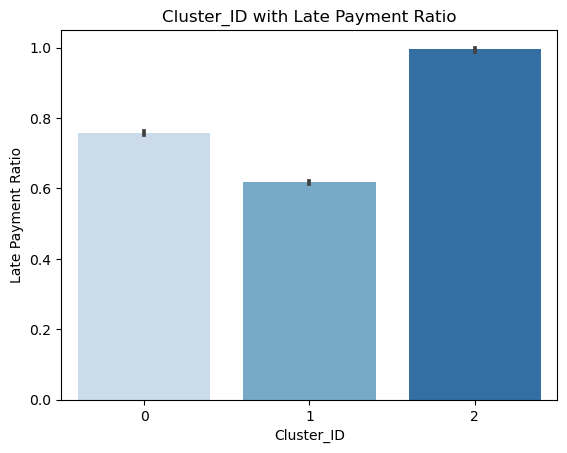

In [185]:
sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean, palette='Blues')
plt.title('Cluster_ID with Late Payment Ratio')
plt.xlabel('Cluster_ID')
plt.ylabel('Late Payment Ratio')
plt.show()

In [186]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'cluster_id'],
      dtype='object')

# Step 4: Data Preparation for Model Building

In [188]:
# creating a new dataframe with important variables for model building

reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [189]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE

reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE', axis=1, inplace=True)
reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


In [190]:
reg_df.shape

(92811, 16)

In [191]:
# Open Invoice dataset

open_reg_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_reg_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [192]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE

open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE', axis=1, inplace=True)
open_reg_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [193]:
# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date', axis=1, inplace=True)
open_reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [194]:
## checking columns for both datasets

reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [195]:
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

## Train and Test Split

In [197]:
# feature variable X
X = reg_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


In [198]:
# target variables X
y = merged_df['default']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: default, dtype: int32

In [199]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,571661.900,0,0,1,0,0,0,0,0,0,0,0,1,0,1,10
29115,1157180.634,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
80920,148278.340,0,0,0,0,0,0,0,0,1,0,0,1,0,1,10
55019,490129.340,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
82266,45541.580,0,0,0,0,0,0,1,0,0,0,0,1,0,1,10


## Feature Scaling

In [201]:
X_train.shape

(64967, 16)

In [202]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,0.038683,0,0,1,0,0,0,0,0,0,0,0,1,0,1,10
29115,0.655995,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
80920,-0.407691,0,0,0,0,0,0,0,0,1,0,0,1,0,1,10
55019,-0.047277,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
82266,-0.516006,0,0,0,0,0,0,1,0,0,0,0,1,0,1,10


In [203]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.496700e+04,64967.00000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,1.055419e-17,0.08138,0.122324,0.150815,0.041236,0.038373,0.135761,0.212092,0.041529,0.023874,0.111641,0.005895,0.941047,0.053058,0.727893,5.465867
std,1.000008e+00,0.27342,0.327662,0.357871,0.198838,0.192097,0.342537,0.408793,0.199511,0.152657,0.314927,0.076555,0.235539,0.224150,0.451060,4.076222
min,-5.640180e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.219380e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,-3.628973e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,6.815221e-02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000
max,1.087496e+01,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


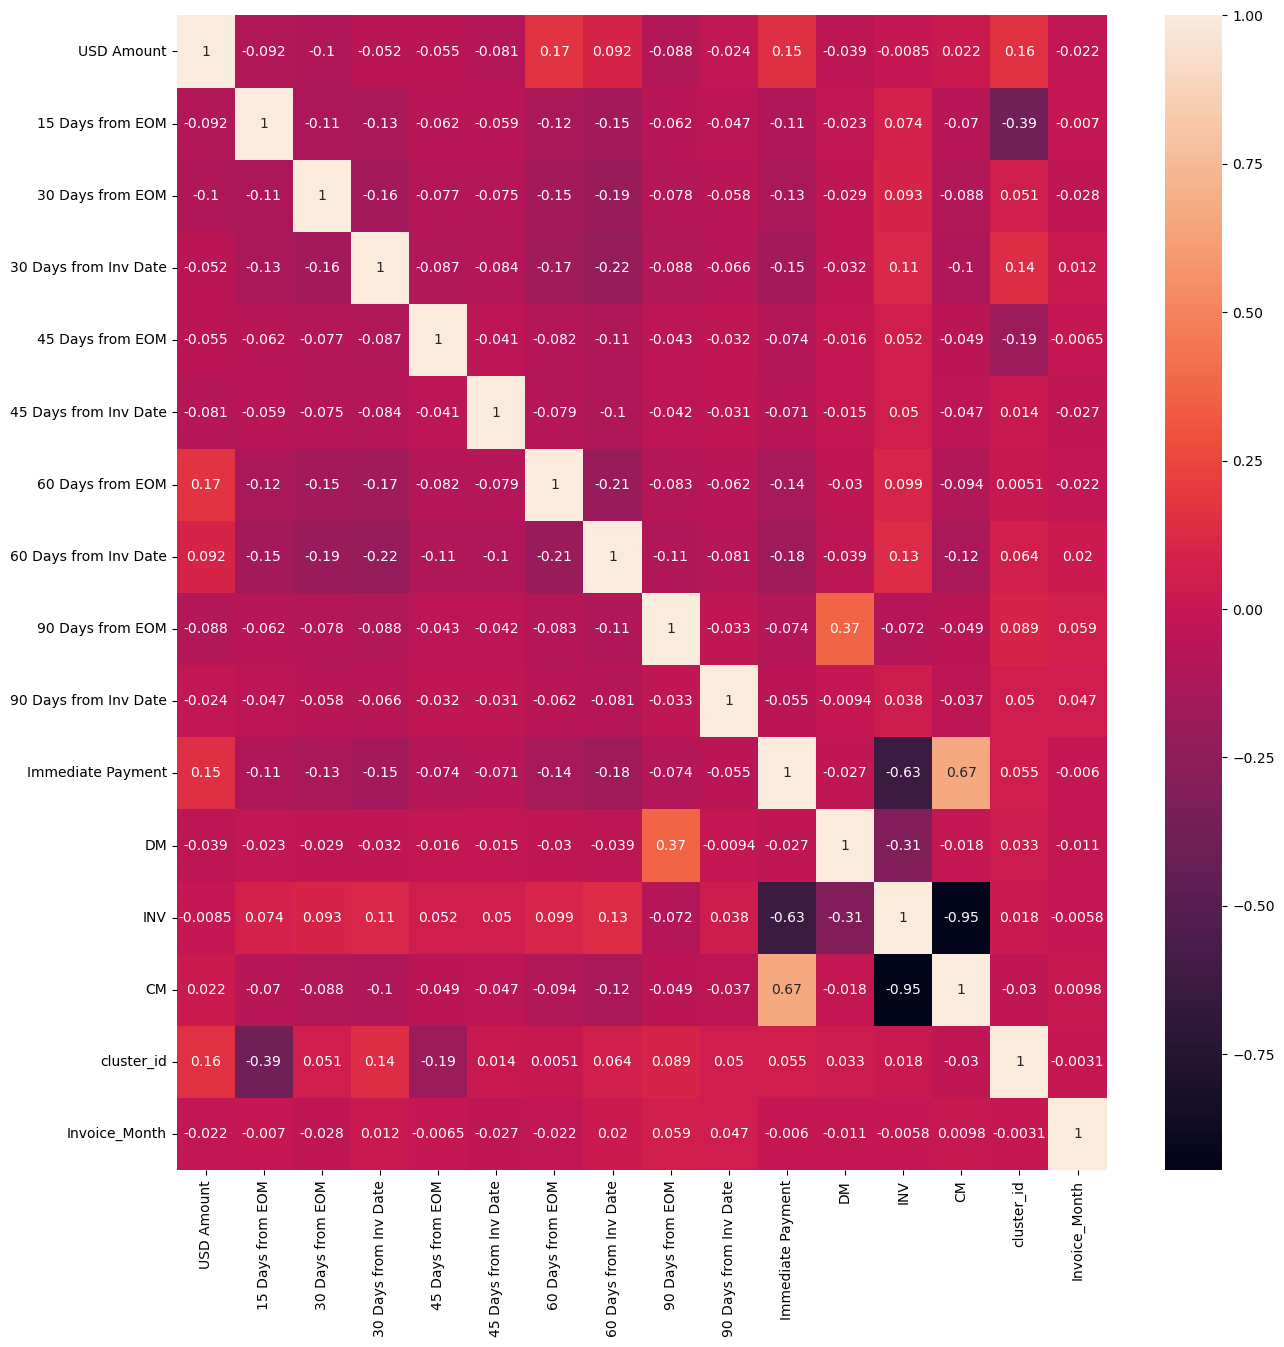

In [204]:
## Ploting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

* CM & INV, INV & Immediate Payment, DM & 90days from EOM has high multicollinearity, hence dropping these columns.

In [206]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

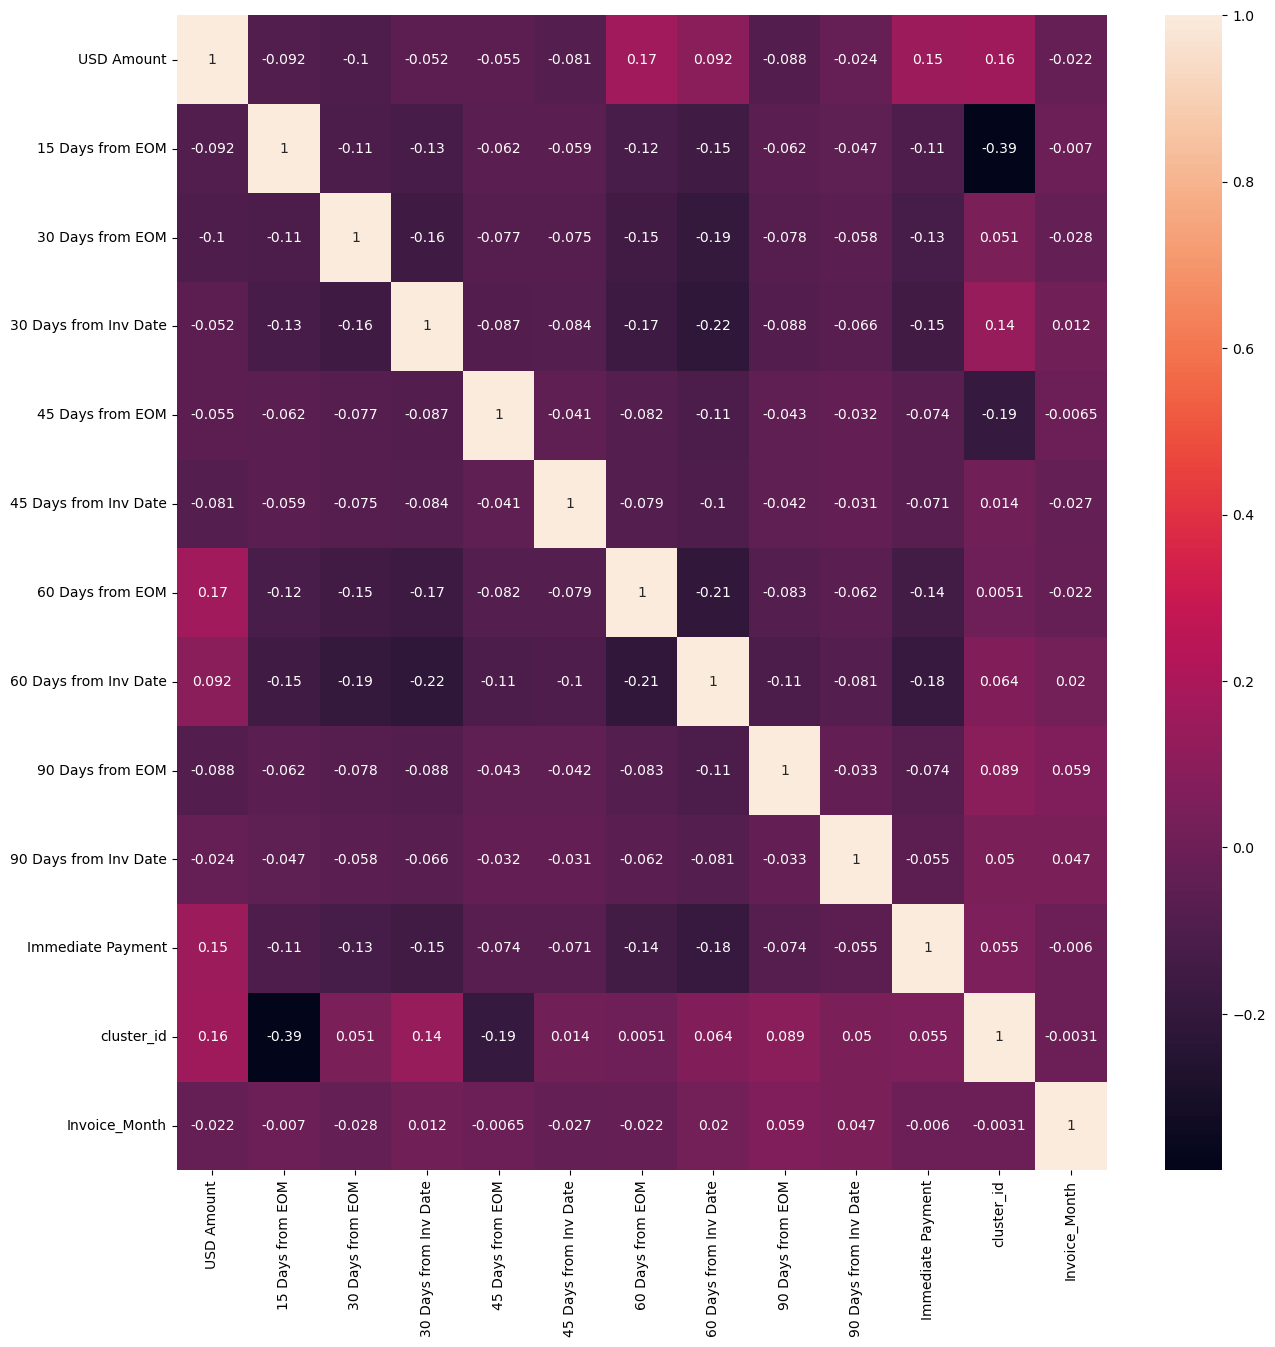

In [207]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

* Now the data has no high multicollinearity. Going ahead with model building.

# Model Building

## Logistic Regression

In [211]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

## Model 1:

In [213]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30149.
Date:                Mon, 11 Nov 2024   Deviance:                       60298.
Time:                        00:59:10   Pearson chi2:                 6.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3021
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9276      0.051     18.107      0.000       0.827       1.028
USD Amount               -0.0450      0.012     -3.769      0.000      -0.068      -0.022
15 Days from EOM          2.5535      0.109     23.465      0.000       2.340       2.767
30 Days from EOM         -2.2725      0.052    -43.388      0.000      -2.375      -2.170
30 Days from Inv Date     0.2621      0.052      5.087      0.000       0.161       0.363
45 Days from EOM          0.3054      0.069      4.399      0.000       0.169       0.442
45 Days from Inv Date    -0.2915      0.063     -4.655      0.000      -0.414      -0.169
60 Days from EOM         -2.1775      0.052    -41.559      0.000      -2.280      -2.075
60 Days from Inv Date    -0.1743      0.049     -3.528      0.000      -0.271      -0.077
90 Days from EOM         -0.4685      0.061     -7.631      0.000      -0.589      -0.348
90 Days from Inv Date    -0.9799      0.069    -14.177      0.000      -1.115      -0.844
Immediate Payment         3.1450      0.105     29.863      0.000       2.939       3.351
cluster_id               -0.4302      0.026    -16.855      0.000      -0.480      -0.380
Invoice_Month             0.0954      0.003     37.651      0.000       0.090       0.100
=========================================================================================
"""

## checking VIF

In [215]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,4.02
12,Invoice_Month,2.67
7,60 Days from Inv Date,2.01
3,30 Days from Inv Date,1.85
2,30 Days from EOM,1.58
6,60 Days from EOM,1.58
10,Immediate Payment,1.54
8,90 Days from EOM,1.29
5,45 Days from Inv Date,1.17
1,15 Days from EOM,1.15


* Both the p-value and VIF are in acceptable range, hence going ahead with this model 

In [217]:
# predicted values for train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52625    0.847107
29115    0.166013
80920    0.620150
55019    0.404942
82266    0.785948
16093    0.980313
54916    0.702051
15532    0.990340
2618     0.792486
79771    0.814860
dtype: float64

In [218]:
# reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84710699, 0.16601339, 0.62014967, 0.4049424 , 0.78594842,
       0.98031333, 0.70205052, 0.99033983, 0.79248625, 0.81486002])

In [219]:
# creating a dataframe for predicted values

y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

,default,default_pred
0,1,0.847107
1,0,0.166013
2,1,0.620150
3,1,0.404942
4,1,0.785948


## Creating a new column 'final_pred' if 'default_pred'>0.5

In [221]:
# Making the prediction based on 0.5 cutoff
 
y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0)
y_pred.head()

,default,default_pred,logreg_pred
0,1,0.847107,1
1,0,0.166013,0
2,1,0.620150,1
3,1,0.404942,0
4,1,0.785948,1


In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [223]:
# confusion matrix

confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)

confusion

array([[12870,  9506],
       [ 4496, 38095]], dtype=int64)

In [224]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))


0.7844751950990503


* We have 78.44% accuracy for our train data set.

In [226]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [227]:
# cheacking the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8944377920217886

In [228]:
# calculating specificity
specificity = TN / float(TN+FP)
specificity

0.575169824812299

In [229]:
# calculating false positive rate
print(FP/ float(TN+FP))

0.4248301751877011


In [230]:
# calculating positive predictive value
print(TP / float(TP+FP))

0.80029831306065


In [231]:
# negative predictive value
print(TN / float(TN+FN))

0.741103305309225


## Finding optimal cutoff point

In [233]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.847107,1,1,1,1,1,1,1,1,1,0
1,0,0.166013,0,1,0,0,0,0,0,0,0,0
2,1,0.620150,1,1,1,1,1,1,1,0,0,0
3,1,0.404942,0,1,1,1,1,0,0,0,0,0
4,1,0.785948,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,1,0.990503,1,1,1,1,1,1,1,1,1,1
64963,1,0.531584,1,1,1,1,1,1,0,0,0,0
64964,1,0.674768,1,1,1,1,1,1,1,0,0,0
64965,0,0.187640,0,1,0,0,0,0,0,0,0,0


In [234]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655579  1.000000  0.000000
0.2   0.2  0.718134  0.973985  0.231141
0.3   0.3  0.772839  0.949144  0.437254
0.4   0.4  0.783998  0.913010  0.538434
0.5   0.5  0.784475  0.894438  0.575170
0.6   0.6  0.770914  0.858585  0.604040
0.7   0.7  0.729709  0.708929  0.769262
0.8   0.8  0.649561  0.499660  0.934886
0.9   0.9  0.541383  0.306285  0.988872


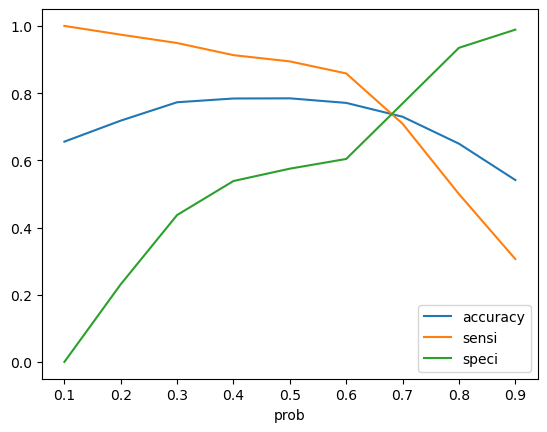

In [235]:
# lets plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

* From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [237]:
# crating a column based on 0.6 cutoff for prediction

y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.847107,1,1,1,1,1,1,1,1,1,0,1
1,0,0.166013,0,1,0,0,0,0,0,0,0,0,0
2,1,0.620150,1,1,1,1,1,1,1,0,0,0,1
3,1,0.404942,0,1,1,1,1,0,0,0,0,0,0
4,1,0.785948,1,1,1,1,1,1,1,1,0,0,1


In [238]:
# lets chech overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7709144642664737

In [239]:
# precision score
precision_score(y_pred.default, y_pred.final_predicted)

0.8049661002025182

In [240]:
# Recall score
recall_score(y_pred.default, y_pred.final_predicted)

0.8585851470968044

In [241]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

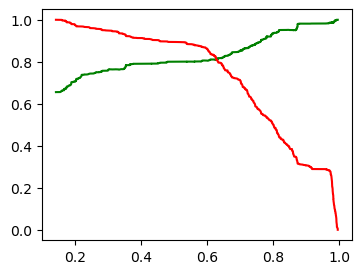

In [242]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

* On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

## Plotting the ROC curve

In [245]:
from sklearn.metrics import roc_auc_score,roc_curve

In [246]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [247]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

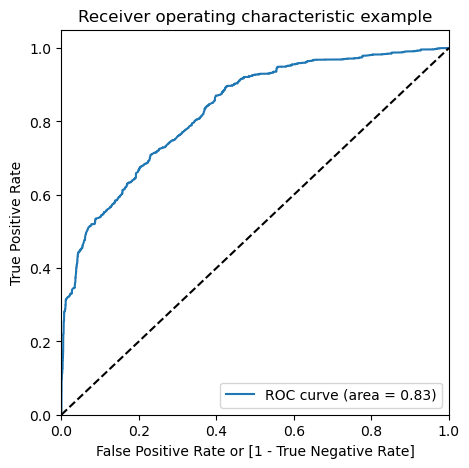

In [248]:
draw_roc(y_pred.default, y_pred.default_pred)

* AUC = 0.83 which shows the model is good.

## Making predictins on the test set


In [251]:
## transforming the numerical column of test set

X_test[['USD Amount']] = scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
12743,-0.282967,0,0,0,0,0,0,0,0,0,1,0,12
75338,-0.543059,0,1,0,0,0,0,0,0,0,0,1,1
39614,0.811935,0,0,0,0,0,0,1,0,0,0,1,4
52529,0.038683,0,0,0,0,0,0,0,0,1,0,1,10
47001,-0.383619,0,1,0,0,0,0,0,0,0,0,1,4


In [252]:
# Adding a constant

X_test_sm = sm.add_constant(X_test)

In [253]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

12743    0.994678
75338    0.160408
39614    0.661124
52529    0.615404
47001    0.201638
90315    0.584323
28144    0.607226
29929    0.178169
80190    0.706800
1736     0.891960
dtype: float64

In [254]:
# converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [255]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [256]:
# putting CUSTID to index
y_test_df['CustID'] = y_test_df.index

In [257]:
y_test_df.head()

,default,CustID
12743,1,12743
75338,1,75338
39614,1,39614
52529,1,52529
47001,0,47001


In [258]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [259]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [260]:
y_pred_final.head()

,default,CustID,0
0,1,12743,0.994678
1,1,75338,0.160408
2,1,39614,0.661124
3,1,52529,0.615404
4,0,47001,0.201638


In [261]:
# renaming the column

y_pred_final = y_pred_final.rename(columns={0 : 'Delay_Prob', 'target':'Delay'})

In [262]:
# lets see the head of y_ored_final
y_pred_final.head()

,default,CustID,Delay_Prob
0,1,12743,0.994678
1,1,75338,0.160408
2,1,39614,0.661124
3,1,52529,0.615404
4,0,47001,0.201638


In [263]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [264]:
y_pred_final.head()

,default,CustID,Delay_Prob,final_predicted
0,1,12743,0.994678,1
1,1,75338,0.160408,0
2,1,39614,0.661124,1
3,1,52529,0.615404,1
4,0,47001,0.201638,0


In [265]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.77251831633386

In [266]:
# precision score

precision_score(y_pred_final.default, y_pred_final.final_predicted)

0.8069843542284487

In [267]:
# recall score
recall_score(y_pred.default, y_pred.final_predicted)

0.8585851470968044

* Our train and test accuracy is almost same around 77.2 %

## Random Forest

In [270]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [271]:
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [272]:
# creating X and y
X = reg_df
y = merged_df['default']

In [273]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)


In [274]:
# building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [275]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [276]:
# checking accuracy and classification report

accuracy = accuracy_score(y_train, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print('Accuracy is :', accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22376
           1       0.95      0.99      0.97     42591

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is : 0.9575476780519341


In [277]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9540748424698562
Standard deviation: 0.0036569154401340774


In [278]:
# creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [279]:
# checking accuracy and classification report of test data

accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print('Accuracy is :', accuracy)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is : 0.922927740267203


## Hyperparameter Tuning

In [ ]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

In [282]:
## test set

y_pred_test_cv = best_rf.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844



* From the above classification report, it can be seen that the f1-score for train and test set is 0.97 and 0.96, which implies that this is a good model. Hence moving forward with this as final model for prediction.

## checking feature importance

In [285]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# printing the feature ranking
print('Feature ranking:')
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.491)
2. Invoice_Month (0.130)
3. 60 Days from EOM (0.113)
4. 30 Days from EOM (0.111)
5. Immediate Payment (0.041)
6. 15 Days from EOM (0.028)
7. cluster_id (0.026)
8. 60 Days from Inv Date (0.012)
9. 30 Days from Inv Date (0.011)
10. INV (0.007)
11. 90 Days from EOM (0.007)
12. 90 Days from Inv Date (0.007)
13. 45 Days from EOM (0.006)
14. CM (0.004)
15. 45 Days from Inv Date (0.004)
16. DM (0.001)


## Preparing Open Invoice dataset for prediction

The 'AGE' column in the open invoice data is computed by subtracting the Transaction Date from the AS_OF_DATE. The payment is obviously past due if the AGE column has a positive value. Therefore, nothing can be predicted. However, if the AGE column has a negative value, it indicates that the deadline has not yet been met. Therefore, only for clients with a negative AGE value should the model be able to anticipate whether or not the payment will be delayed.

In [288]:
# selecting rows with negative age value for prediction

open_reg_df_age = open_data[open_data['AGE'] < 0 ]
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [289]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [290]:
# Null counts
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
CM                       0.0000
cluster_id               0.0274
dtype: float64

* Since cluster_id contains 2.7% null value counts, the null values are removed for improved model prediction because they pertain to new customers whose information is not included in the "Received Payment data.

In [292]:
# Dropping the rows containing null vaues

open_reg_df_age.dropna(axis=0, inplace=True)

In [293]:
open_reg_df_age.shape

(27247, 19)

In [294]:
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0


In [295]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int32         
 6   30 Days from EOM       27247 non-null  int32         
 7   30 Days from Inv Date  27247 non-null  int32         
 8   45 Days from EOM       27247 non-null  int32         
 9   45 Days from Inv Date  27247 non-null  int32         
 10  60 Days from EOM       27247 non-null  int32         
 11  60 Days from Inv Date  27247 non-null  int32         
 12  90 Days from EOM       27247 non-null  int32         
 13  90 Day

In [296]:
## converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [297]:
# checking the head after adding 'cluster_id' column
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [298]:
# creating a copy of open_reg_df_age for final prediction

open_reg_df_final = open_reg_df_age.copy()

In [299]:
# droping Customer_Name and AGE column

open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [300]:
# Extracting Month
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month 

In [301]:
# droping due_date and invoice creation date

open_reg_df_final.drop(['Due Date', 'INV_CREATION_DATE'], axis = 1, inplace = True)

In [302]:
# checking the columns in the dataset
open_reg_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

## Final Prediction based on Random Forest model

In [304]:
# getting predictions on open invoices

y_open_invoices = best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([0.98324005, 0.85976586, 0.84066422, ..., 0.34277778, 1.        ,
       0.34533333])

In [305]:
# Adding the predicted values to the dataframe

open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.983240
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.859766
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.840664
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.000000
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.986667


In [306]:
# Select only numeric columns from the DataFrame
numeric_df = open_reg_df_age.select_dtypes(include=['number'])

# Group by 'Customer_Name' and apply the product operation to 'Pred_rf' column only
customer_seg_prob = numeric_df.groupby(open_reg_df_age['Customer_Name'])['Pred_rf'].prod().round(4).reset_index()

# Display the resulting DataFrame
customer_seg_prob



,Customer_Name,Pred_rf
0,3D D Corp,0.0000
1,6TH Corp,0.0066
2,ABDU Corp,0.0000
3,ABEE Corp,0.0784
4,ABU Corp,0.0034
...,...,...
391,XPRE Corp,0.0000
392,YOUG Corp,0.3659
393,YOUS Corp,0.0000
394,ZAHR Corp,0.0001


In [307]:
# taking 0.6 as cut off value

open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [308]:
# lets us check our final dataframe with predictions
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.983240,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.859766,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.840664,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.000000,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.986667,1


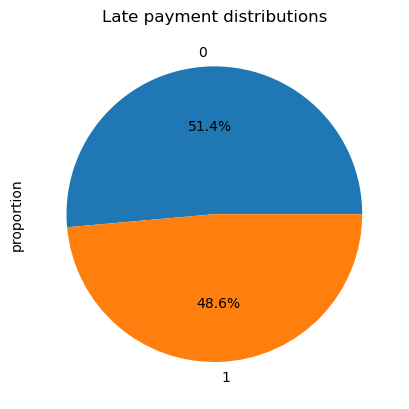

In [309]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

* From the above pie chart, we can observe that 51.4% payments in the open invoice data with AGE value negative(indicating due date not crossed)

## Summary of prediction on Customer_Name

In [312]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [313]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [314]:
## merging both dataframe based on Customer_Name
Merge_df = pd.merge(Delay_payment, Delay_payment_total, how='inner', on='Customer_Name')

In [315]:
## merging both dataframe based on Customer_Name

Merge_df.columns = ['Delayed_Payment', 'Total_Payments']

In [316]:
## CReating a column for delay percentage of each customers

Merge_df['Delay%'] = np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100, 2)

In [317]:
# Checking Merge_df

Merge_df.sort_values('Total_Payments', ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4064,8260,49.20
FITR Corp,1527,3454,44.21
PARF Corp,1015,1717,59.11
AREE Corp,749,1117,67.05
ALLI Corp,340,1042,32.63
...,...,...,...
BECC Corp,1,1,100.00
ATYA Corp,1,1,100.00
ARCO Corp,1,1,100.00


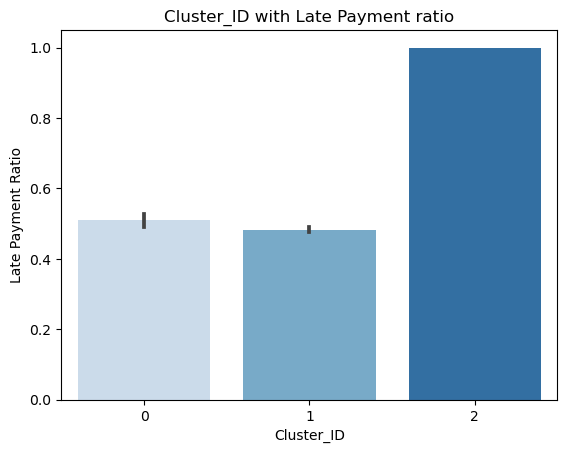

In [318]:
#cluster ID 2 has significantly higher ratio of default than clusters 0 and 1
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='Blues')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()


In [319]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
RNA Corp,9,9,100.0
SHIS Corp,8,8,100.0
ALSU Corp,7,7,100.0
LVMH Corp,4,4,100.0
TRAF Corp,3,3,100.0
MAYC Corp,3,3,100.0
AMAT Corp,3,3,100.0
MUOS Corp,3,3,100.0
DAEM Corp,3,3,100.0


## Recommendations based on the derived insights:

* Our clustering technique allows us to draw the following conclusions.
* Compared to debit note or invoice type invoice classes, credit note payments have the highest delay rate; therefore, firm policies regarding payment collection should be more stringent with regard to these invoice classes.
* Goods type invoices had significantly greater payment delay rates than non-goods types and hence can be subjected to stricter payment policies.
* It is advised to concentrate more on lesser value payments because they make up the majority of transactions and are also more likely to have late payments. Depending on the billing amount, the business may impose penalties; the lower the bill, the higher the percentage of late payment penalties. This must be the last option, of course.
* Three categories—0, 1, and 2—which stand for medium, prolonged, and early payment durations, respectively—were created by clustering customer segments. Cluster 1 consumers should receive special attention because it was discovered that their delay rates were noticeably higher than those of early and middle days of payment.
* Due to their high likelihood rates, the companies listed above with the highest probability and total and delayed payment counts should be given priority and more attention.